# Churn Prediction: Model Comparison and Optimization

## Introduction

The Telco customer churn data contains information about a fictional telco company operating in the USA, that provides home phone and Internet services to 7043 customers in California. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

The analysis of the dataset will be laid out in the following steps:
1. [Understanding the problem](#understanding)
2. [Data Structure](#structure)
3. [Data Cleaning](#cleaning)
4. [Data Transformation](#transformation)
5. [Data Explanatory Analysis](#exploration)
6. [Prediction Model](#prediction)
7. [Business Actions Recommendations](#actions)


## 1. Understanding the problem

<div id="understanding">
Customer churn records provide the status of customers related to a particular business and its products along with customer information, that can help us understand the profile, as well as make assumptions on the reasons behind their choices. The aim of churn analysis is to successfully quantify these attributes and behaviour in a way that will allow the company to adjust its current or planned products.

### Background and definitions

A telecommunications company provides services such as telephony and data communications access, including internet service providers to both residential and businesses clients. There are many private telcom companies in the USA, where this dataset is sourced from.

**Customer churn** (or customer attrition) refers to the loss of customers or subscribers for any reason. Businesses measure and track churn as a percentage of lost customers compared to total number of customers over a given time period. This metric is usually tracked monthly and reported at the end of the month.

The problem can be phrased as "Increasing client retention through understanding the reasons behind it". The context of the problem is its business and population landscape, meaning the needs of the clients and the solutions offered by the specific company and its competitors.

In practice, customer churn prediction uses statistical analysis and machine learning techniques to predict the probability of a customer leaving the company (churn). As part of it, we aim at determining how client and product features interact and what their influence is on churn outcomes.

#### Why is Churn important?

With rising customer acquisition costs and high market competition, businesses strive to avoid losing customers as a vital goal to their profitability. Without predictable sources of revenue, it’s very difficult to sustain a business over the long-term. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate (measured by the number of leaving customers).

Customer acquisition cost is the total costs of sales and marketing efforts that are needed to acquire a customer. It is one of the most defining factors in whether a company has a viable business model that can yield profits by keeping acquisition costs low as it scales. *In general, it’s less costly to improve existing customer satisfaction to retain them, than acquiring new ones.*

#### Preventing Churn

For most types of churn, there are strategies one can put in place to identify at-risk customers and prevent them from churning by addressing their concerns. By identifying which customers are at risk of leaving, companies can take action such as optimizing inventory levels more effectively to avoid customer dissatisfaction, run new campaigns to engage them, or provide special offers and pricing.

To do so, companies need to understand the underlying issues that contribute to churn, predict how churn will impact the business, and find ways to combat it. **Customer churn analysis** – the process of analyzing data to identify trends, patterns, and correlations – is important to determine what causes  users and customers to keep using a service or depart.

#### Approach

As this is a sample dataset, there is no guidelines or information from the company stakeholders regarding the problem to be solved. However, by going through the description the dataset we can make some guesses on the possible anwers stakeholders would expect:<br>

1. Demographic characteristics of costumers leaving, such as age, children etc. This could establish the audience where ads and promotions can focus on.
2. Geographical differentiation, to establish possible competition affecting churn.
3. Does increasing the sense of belonging by being referred to or referring someone else affect retention scores?
4. Type of service the customers were using - could it be that specific products are less developed or competitive?
5. Fees charged and churn rates - should the company look into ways of reducing costs?
</div>

## 2. Data Structure

<div id="structure">    
Let's start by loading the libraries we will be using:
</div>

In [82]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
import scipy.stats as stats
!pip install drawarrow
# for scaling numerical features
from sklearn.preprocessing import StandardScaler
# for hot-encoding
from sklearn.preprocessing import OneHotEncoder
# prediction model validation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Next, let's look at the dataset itself:

In [83]:
df_raw = pd.read_csv("/kaggle/input/telco-customer-churn-11-1-3/telco.csv")

In [84]:
df_raw.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [85]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [86]:
df_raw.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


## 3. Data Cleaning

<div id="cleaning">
By data cleaning we refer to the process of correcting the data or removing inconsistencies related to incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within the dataset. 
</div>

### 3.1. Checking for missing values

In [87]:
# Calculate missing values
missing_values = df_raw.isnull().sum()

# Create a DataFrame to check ratios per feature
missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Values': missing_values.values,
    '% Missing': (missing_values.values / len(df_raw)) * 100
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Display the missing values report
print(missing_df)

           Feature  Missing Values  % Missing
19           Offer            3877  55.047565
24   Internet Type            1526  21.666903
48  Churn Category            5174  73.463013
49    Churn Reason            5174  73.463013


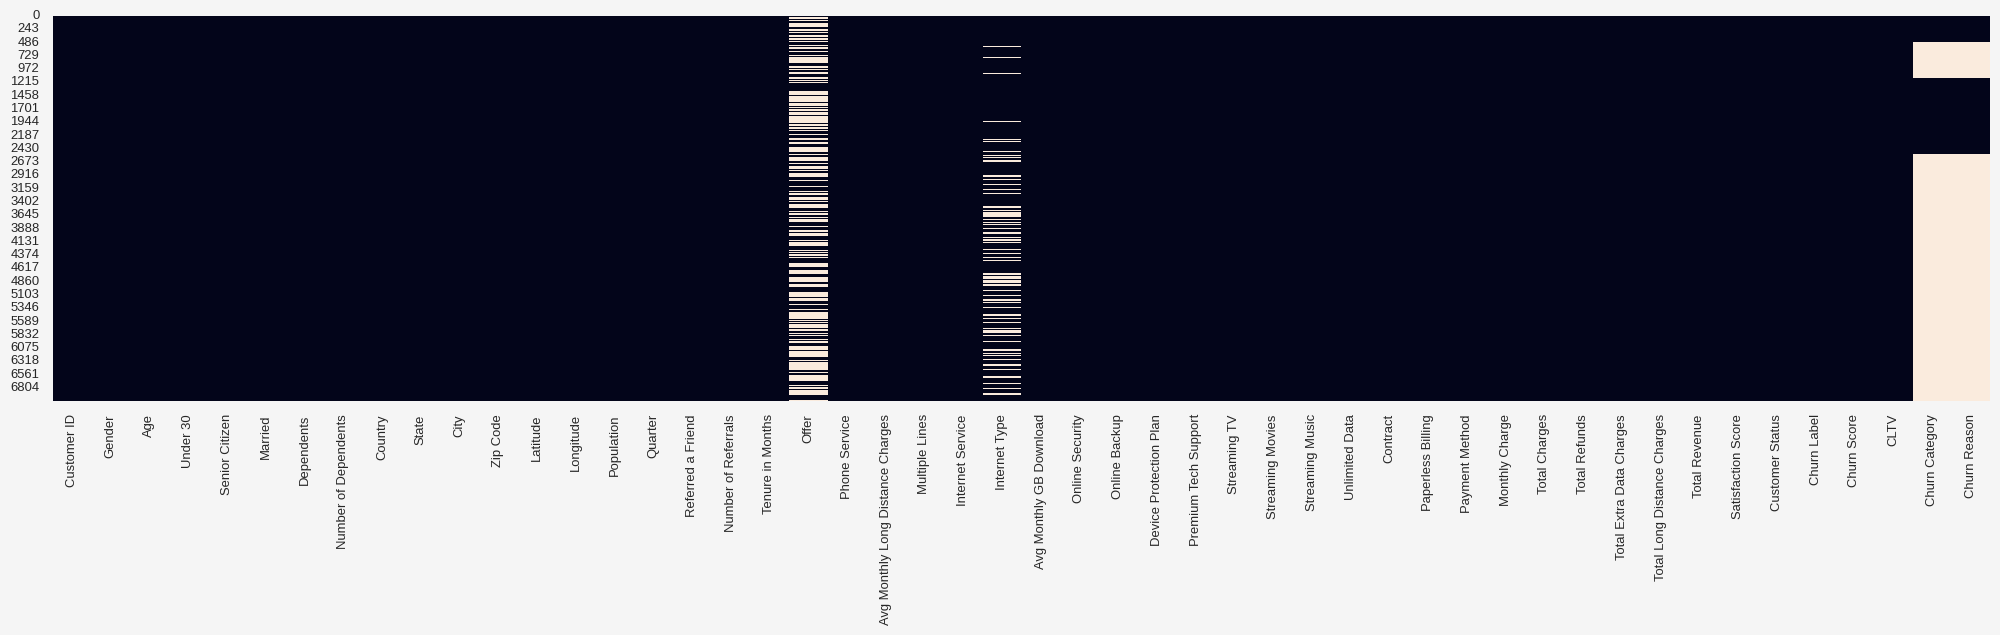

In [88]:
fig, ax = plt.subplots(figsize=(25, 5))
 
# drawing the plot
sns.heatmap(df_raw.isnull(), cbar=False)
plt.show()

The missing values will be treated as follows:
- **Churn Category and Churn Reason:** they are missing when Churn Status ('Churned', 'Stayed', 'Joined') is other than 'Churned', which makes sense, so it is not a data collection error. I will not imputate these columns, because adding e.g. a 'Has_Churn_Info' column would create perfect multicollinearity with Churn Status, since Churn Category and Churn Reason are only present when Churn Status = 'Churned'. This could lead to redundant information in distance-based models (such as KNN), and would likely distort our results. I will therefore keep these columns as they are.

In [89]:
print(plt.rcParams["font.sans-serif"])
print(plt.rcParams["font.monospace"])

['Liberation Sans']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


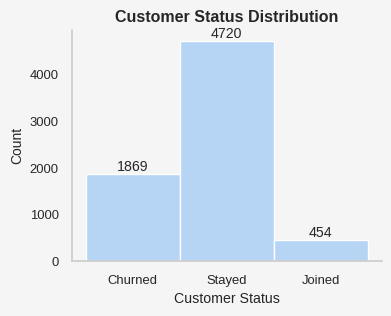

In [ ]:
# Set Seaborn theme 
sns.set_theme(
    style="whitegrid", 
    palette="pastel",
    rc={
        'axes.grid': False,  
        'figure.figsize': (4,3),
        'axes.facecolor': '#f5f5f5', 
        'figure.facecolor': '#f5f5f5'
    },
    font_scale=0.85  
)


# Set font
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Liberation Sans"]

ax = sns.histplot(data=df_raw, x="Customer Status")

# Remove the grid and border
ax.grid(False)
sns.despine()

# Set title & axis labels
ax.set_title("Customer Status Distribution", 
             fontsize=11.5, 
             fontweight='bold')
ax.set_ylabel("Count", fontsize=10)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

Therefore, a total of 5174 clients are non-churners and 1869 are churners.

In [91]:
df_raw['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [92]:
df_raw['Churn Reason'].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

- **Internet Type:** The missing values most likely correspond to 'Internet Service' = 'No'. Let's check:

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


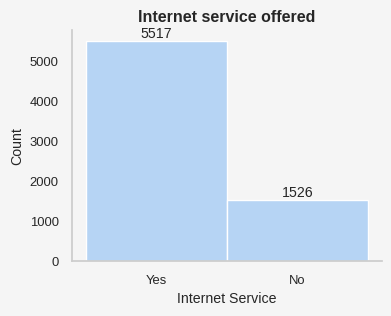

In [93]:
ax = sns.histplot(data=df_raw, x="Internet Service")

# Remove the grid and border
sns.despine()

ax.set_title("Internet service offered", 
             fontsize=11.5, 
             fontweight='bold')

for i in ax.containers:
    ax.bar_label(i,)

So, for the same reasons provided earlier in the Churn Reason and Category columns missing data, we won't be imputating. The 'Internet Service' column will be used in the analysis with entries filtered for 'Internet Service' = 'Yes'. However, as missing values (NaN) can cause division-by-zero errors, we will assign them with a 'No Internet' value:

In [94]:
df_raw['Internet Type'] = df_raw['Internet Type'].fillna('No Internet')

The 'Offer' column refers to the last marketing offer that the customer accepted, if applicable. Since it is plausible that 55% of the clients might not have accepted a marketing offer, we will fill in the missing data as "No Offer" and will treat it as such.

In [95]:
df_raw['Offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [96]:
df_raw['Offer'] = df_raw['Offer'].fillna('No Offer')

In [97]:
df_raw['Internet Type'] = df_raw['Internet Type'].fillna('No Internet')

In [98]:
df_raw['Churn Category'] = df_raw['Churn Category'].fillna('not applicable')
df_raw['Churn Reason'] = df_raw['Churn Reason'].fillna('not applicable')

So let's check the dataset following 'na' values correction:

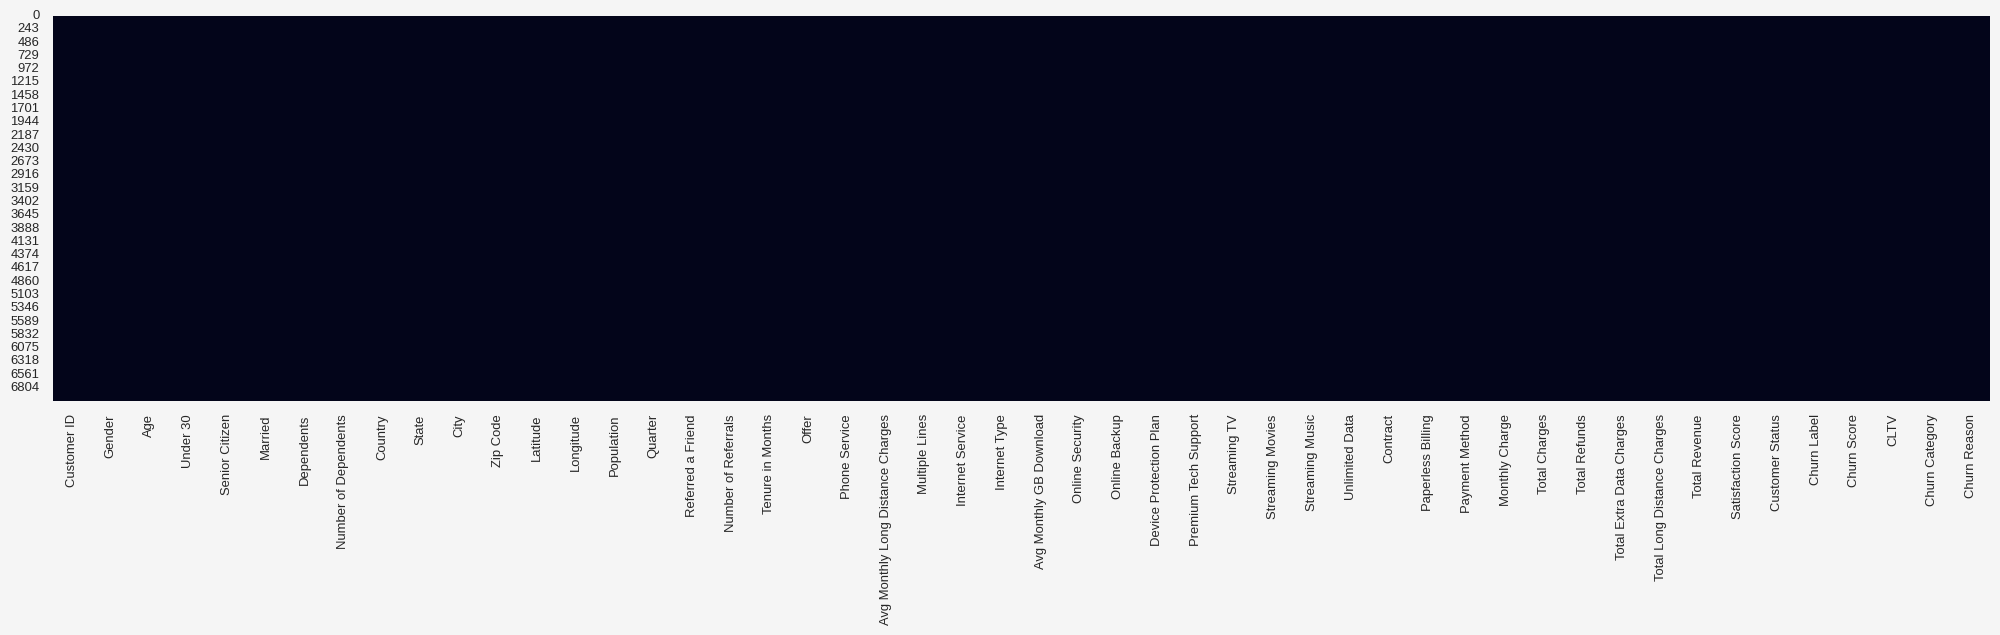

In [99]:
fig, ax = plt.subplots(figsize=(25, 5))
 
# drawing the plot
sns.heatmap(df_raw.isnull(), cbar=False)
plt.show()

### 3.2. Checking for Duplicates

Checking for duplicate values is straightforward:

In [100]:
num_duplicates = df_raw.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")

Total duplicate rows: 0


### 3.3. Checking for Inconsistencies

In [101]:
# Identify categorical columns
cat_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {cat_cols}")

Categorical Columns: ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']


In [102]:
# Print unique values for each categorical column
for col in cat_cols:
    print(f"Unique values in {col}: {df_raw[col].unique()}\n")

Unique values in Customer ID: ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

Unique values in Gender: ['Male' 'Female']

Unique values in Under 30: ['No' 'Yes']

Unique values in Senior Citizen: ['Yes' 'No']

Unique values in Married: ['No' 'Yes']

Unique values in Dependents: ['No' 'Yes']

Unique values in Country: ['United States']

Unique values in State: ['California']

Unique values in City: ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']

Unique values in Quarter: ['Q3']

Unique values in Referred a Friend: ['No' 'Yes']

Unique values in Offer: ['No Offer' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

Unique values in Phone Service: ['No' 'Yes']

Unique values in Multiple Lines: ['No' 'Yes']

Unique values in Internet Service: ['Yes' 'No']

Unique values in Internet Type: ['DSL' 'Fiber Optic' 'Cable' 'No Internet']

Unique values in Online Security: ['No' 'Yes']

Unique values in Online Backup: ['No' 'Yes']

Un

No inconsistencies found! However, columns 'Country', 'State' and 'Quarter' have only one unique value and therefore provide no useful information, so we can drop them:

In [103]:
df_raw = df_raw.drop(columns=['Country', 'State', 'Quarter'])

### 3.4. Fixing Data Types

Running describe() on the dataset earlier in the code, the column types that should have their type fixed are the following:

| Column             | Current Type | Correct Type      |
| ------------------ | ------------ | ----------------- |
| Under 30           | object       | bool (True/False) |
| Senior Citizen     | object       | bool (True/False) |
| Married            | object       | bool (True/False) |
| Dependents         | object       | bool (True/False) |
| Zip Code           | int64        | string            |
| Quarter            | object       | category          |
| Referred a Friend  | object       | bool (Yes/No)     |
| Contract           | object       | category          |
| Payment Method     | object       | category          |

In [ ]:
# Convert Customer ID & Zip Code to string
df_raw['Zip Code'] = df_raw['Zip Code'].astype('string')

# Convert boolean-like categorical columns to boolean
bool_columns = ['Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend']
for col in bool_columns:
    df_raw[col] = df_raw[col].map({'Yes': True, 'No': False})

# Convert categorical columns to category type
category_columns = ['Contract', 'Payment Method']
for col in category_columns:
    df_raw[col] = df_raw[col].astype('category')

print(df_raw.dtypes)

Customer ID                                  object
Gender                                       object
Age                                           int64
Under 30                                       bool
Senior Citizen                                 bool
Married                                        bool
Dependents                                     bool
Number of Dependents                          int64
City                                         object
Zip Code                             string[python]
Latitude                                    float64
Longitude                                   float64
Population                                    int64
Referred a Friend                              bool
Number of Referrals                           int64
Tenure in Months                              int64
Offer                                        object
Phone Service                                object
Avg Monthly Long Distance Charges           float64
Multiple Lin

## 4. Data Transformation

<div id="transformaton">
At this stage, we'll look into the actual data, to understand it and establish the metrics we are going to use in order to draw conclusions. Therefore, the focus will be on:
    
1. What needs to be figured out in order to address the problem?
2. What measurements would help provide an understanding of the problem?
</div>

I'll start by looking at the relationship between the features with more detail:

### 4.1. Numerical features correlations

Let's start by looking at the correlation between numerical features:

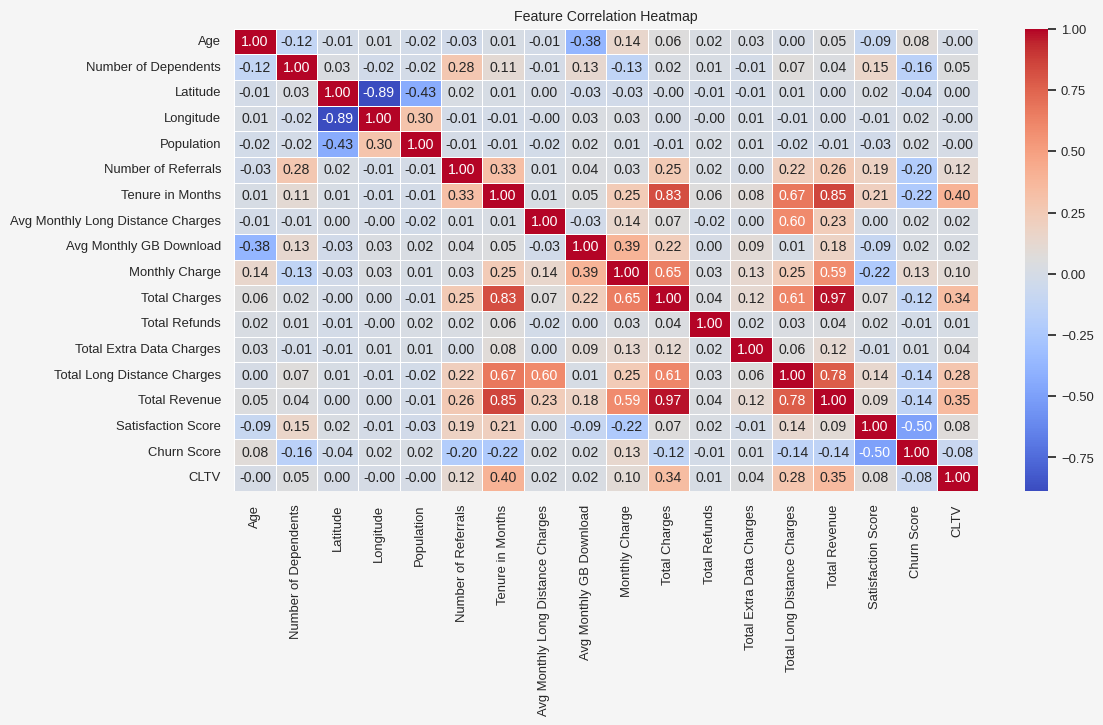

In [105]:
plt.figure(figsize=(12,6))
df_numerical = df_raw.select_dtypes(include=['int64', 'float64'])

sns.heatmap(df_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Observations on numerical features correlation

**High Positive Correlations (Strong Relationships)**

* Total Charges, Monthly Charges and Total Revenue are highly correlated. This is expected, since total revenue is the sum of charges.
* Total Long Distance Charges & Total Revenue have a strong correlation.
* Total Extra Data Charges & Total Charges are also highly correlated.
* Features like Total Revenue, Total Charges, and Monthly Charges might be redundant in a model due to multicollinearity. We should consider dropping one of them or using dimensionality reduction (PCA or VIF analysis).

**Churn Score Shows Some Correlations**

* Churn Score has a negative correlation with Satisfaction Score, meaning lower satisfaction tends to be associated with higher churn, which makes sense.
 
**Weak Correlations (No Strong Relationship)**

Age, Number of Dependents, Latitude/Longitude, and Population show little correlation with most features.
We'll need to check how these features interact with categorical data (e.g., contract type, service plan), to decide on keeping them or not.

#### Variance Inflation Factor (VIF) Analysis

In [ ]:
# Compute correlation matrix
corr_matrix = df_numerical.corr().abs()

# Find features with correlation higher than 0.95 
high_corr_vars = np.where((corr_matrix > 0.95) & (corr_matrix < 1))

# Get feature pairs
high_corr_pairs = [(df_numerical.columns[i], df_numerical.columns[j]) 
    for i, j in zip(*high_corr_vars) if i != j]

# Remove duplicates (since correlation matrix is symmetric)
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))

# Print highly correlated features
print("Highly correlated features (R > 0.95):", high_corr_pairs)

Highly correlated features (R > 0.95): [('Total Charges', 'Total Revenue')]


Let's drop "Total Charges":

In [107]:
df_numerical = df_numerical.drop(columns=['Total Charges'])

In [108]:
# Remove any columns that are constant (to avoid division by zero)
df_numerical = df_numerical.loc[:, df_numerical.nunique() > 1]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                              Feature         VIF
3                           Longitude  622.151977
2                            Latitude  472.159198
13                      Total Revenue   33.539593
9                      Monthly Charge   22.978875
6                    Tenure in Months   20.784133
16                               CLTV   17.636865
12        Total Long Distance Charges   12.979178
15                        Churn Score   11.945573
14                 Satisfaction Score   11.862379
0                                 Age   11.713265
7   Avg Monthly Long Distance Charges    9.153916
8             Avg Monthly GB Download    3.266723
4                          Population    2.673368
5                 Number of Referrals    1.734954
1                Number of Dependents    1.446732
11           Total Extra Data Charges    1.102625
10                      Total Refunds    1.073243


#### Comments on the Variance Inflation Factor (VIF) results:

* Longitude (622.15) and Latitude (472.15) are highly redundant and likely provide no useful variance. They are geographic coordinates, which might not be relevant unless used for regional analysis.
* Total Revenue (33.54) & Monthly Charges (22.97) are highly correlated with each other, as evident in the Correlation Heatmap, too. One of them can be dropped.
* Customer lifetime value is calculated by multiplying the average revenue per client by gross margin and dividing that number by their churn rate. As it is calculated from other financial metrics, it makes sense for its VIF to be high.
* A high VIF score for Churn Score & Satisfaction Score also makes sense, as lower satisfaction often leads to higher churn. We can drop on of the two.

#### Dropping high VIF numerical features

In [109]:
# Define high VIF features to drop
high_vif_features = [
    'Longitude', 'Latitude', 'Total Revenue',  
    'Tenure in Months', 'CLTV', 'Total Long Distance Charges', 
    'Churn Score'
]

# Drop high VIF columns
df_numerical_reduced = df_numerical.drop(columns=high_vif_features)

# Recompute VIF after dropping
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = df_numerical_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(df_numerical_reduced.values, i) for i in range(df_numerical_reduced.shape[1])]

print(vif_data_reduced.sort_values(by="VIF", ascending=False))

                             Feature       VIF
6                     Monthly Charge  8.053790
0                                Age  7.456286
9                 Satisfaction Score  5.709441
4  Avg Monthly Long Distance Charges  3.114525
5            Avg Monthly GB Download  2.910361
2                         Population  2.001026
3                Number of Referrals  1.597317
1               Number of Dependents  1.431258
8           Total Extra Data Charges  1.095145
7                      Total Refunds  1.066228


Age is above the VIF=5 score we have considered as high, however we will keep it in the dataset as it might provide some interesting insights later on.

### 4.2. Categorical Features Correlation

For categorical features' correlation analysis, we will use Cramér’s V, a measure of association between two nominal variables. Cramér's V varies from 0 (corresponding to no association between the variables) to 1 (complete association) and can reach 1 only when each variable is completely determined by the other:

* 0 to 0.1: Little to no association
* 0.1 to 0.3: Weak association
* 0.3 to 0.5: Moderate association
* 0.5 to 1.0: Strong association - it reflects significant interdependence

Let's start by selecting the categorical columns of the dataset:

In [110]:
# Select categorical columns (object, category, and boolean)
cat_cols = df_raw.select_dtypes(include=['object', 'category', 'bool', 'string[python]']).columns.drop(['Customer ID'])

In [111]:
# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér's V for all categorical pairs
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(df_raw[col1], df_raw[col2])
        else:
            cramers_results.loc[col1, col2] = 1.0  # Correlation with itself

# Convert to float for better sorting
cramers_results = cramers_results.astype(float)

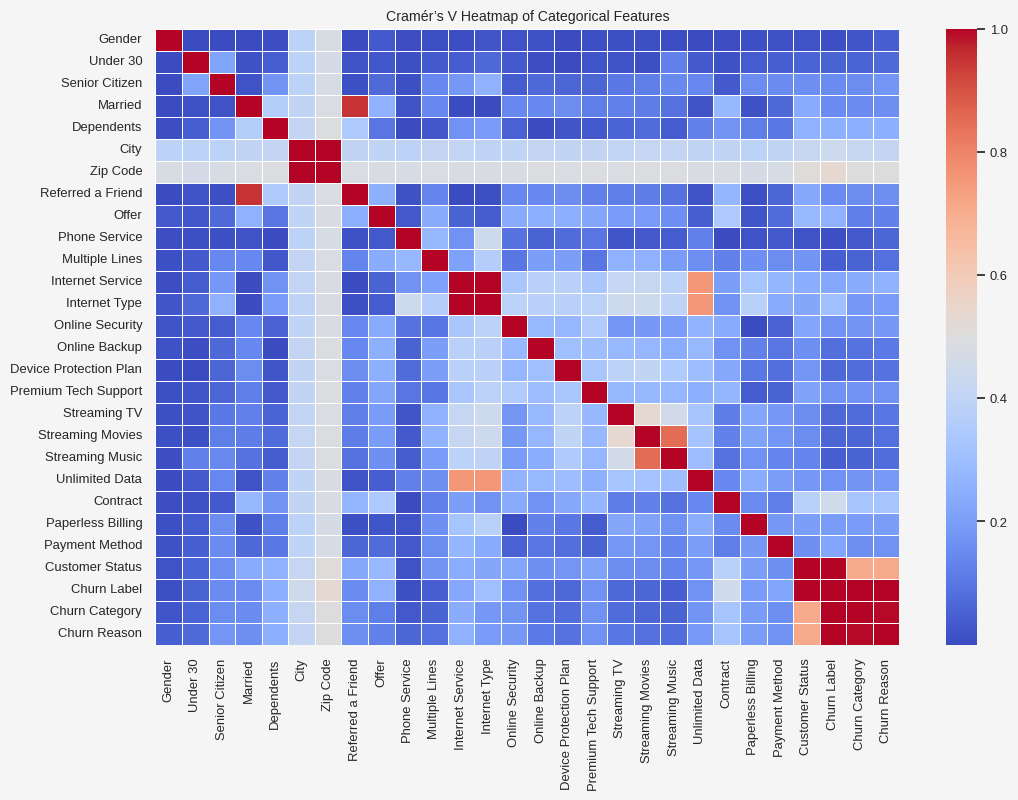

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_results, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Cramér’s V Heatmap of Categorical Features")
plt.show()

One can easily notice that the City and Zip Code features stand out by their lack of correlation with other features. We will examine their correlation with Churn Label later on, but for the time being let's register the unique values in each:

In [113]:
print("The City column has",df_raw['City'].nunique(),"unique values")
print("The Zip Code column has",df_raw['Zip Code'].nunique(),"unique values")

The City column has 1106 unique values
The Zip Code column has 1626 unique values


As this is a massive table, making it difficult to extract insights, let's focus on feature pairs with Cramér’s V > 0.5, which indicates a strong association:

In [114]:
# Set correlation threshold 
threshold = 0.5

# Extract upper triangle of correlation matrix (excluding self-correlations)
cramers_filtered = cramers_results.where(np.triu(np.ones(cramers_results.shape), k=1).astype(bool))

# Convert matrix to a long format DataFrame
cramers_long = cramers_filtered.stack().reset_index()
cramers_long.columns = ['Feature 1', 'Feature 2', 'Cramér’s V']

# Filter only strong correlations
strong_correlations = cramers_long[cramers_long["Cramér’s V"] > threshold].sort_values(by="Cramér’s V", ascending=False)

print(strong_correlations)

            Feature 1          Feature 2  Cramér’s V
242  Internet Service      Internet Type    1.000000
372   Customer Status        Churn Label    1.000000
125              City           Zip Code    1.000000
376       Churn Label       Churn Reason    1.000000
375       Churn Label     Churn Category    1.000000
377    Churn Category       Churn Reason    0.993715
81            Married  Referred a Friend    0.949701
333  Streaming Movies    Streaming Music    0.848223
265     Internet Type     Unlimited Data    0.755751
250  Internet Service     Unlimited Data    0.755366
373   Customer Status     Churn Category    0.707107
374   Customer Status       Churn Reason    0.707107
165          Zip Code        Churn Label    0.534890
323      Streaming TV   Streaming Movies    0.532794
164          Zip Code    Customer Status    0.507938
166          Zip Code     Churn Category    0.503812
167          Zip Code       Churn Reason    0.500979


At this point, a distinction should be made between the features that will be used in the predictive model and those in the explanatory analysis. The reason is that:
1. Keeping features highly correlated to each other or the output (label) will lead to data leakage. That means in simple words that, when working with the test dataset, e.g. Customer Status, Churn Reason, Churn Category and Churn Lable will not be available.
2. However, these can be used separately for analysis after churn prediction is completed, to explain customer churn patterns.

Out of the features with perfect correlation, I will keep those that provide more detail:
* **Internet Type** vs Internet Service
* Customer Status vs Churn Label: both will be removed (data leakage)
* City vs Zip Code: We'll keep both in, till we examine their relationship to Churn later on
* Churn Label vs Churn Reason: both will be removed (data leakage)
* Churn Label vs Churn Category: both will be removed (data leakage)
* Churn Category vs Churn Reason: both will be removed (data leakage)
* Married vs Referred a Friend: Referrals don't depend on marital status, so I'll keep both for the time being.
 
I will keep the remaining features with high correlation and will re-evaluate them during modeling.

In [115]:
df_categorical = df_raw[cat_cols].drop(['Internet Service', 'Churn Label', 'Customer Status', 'Churn Reason', 'Churn Category'], axis=1)

### 4.3. Categorical vs Numerical Features Correlation

To test whether a categorical feature significantly impacts a numerical feature, we will use an ANOVA (Analysis of Variance) test. The goal is to determine whether the means of a numerical variable differ significantly across the different categories of a categorical variable.

ANOVA tests whether the means of the numerical variable are the same across all groups defined by the categorical variable, e.g. if the 'Avg Monthly GB Download' means is the same between 'male' and 'female' genders (this the null hypothesis - H₀) . If the test yields a low p-value (i.e. < 0.05), we reject H₀ and conclude that at least one group has a significantly different mean.

The outcome of this variance test can be:
- If ANOVA suggests a strong relationship, we might choose to encode the categorical variable using methods like one-hot encoding instead of treating it as arbitrary categories.
- If a categorical feature significantly impacts multiple numerical features, it may be a key predictor even if its direct relationship with the outcome ("churn") is weak.
- If a categorical feature does not significantly impact any numerical features, it might be dropped or treated differently.

In [116]:
# Select categorical and numerical columns
cat_cols = df_categorical.columns
num_cols = df_numerical_reduced.columns

In [117]:
# Dictionary to store ANOVA results
anova_results = {}

# Loop through categorical and numerical feature pairs
for cat in cat_cols:
    for num in num_cols:
        try:
            # Group numerical data by categorical values
            groups = [df_raw[num][df_raw[cat] == category] for category in df_raw[cat].unique()]
            
            # Perform ANOVA
            f_stat, p_value = stats.f_oneway(*groups)
            
            # Store results
            anova_results[(cat, num)] = {'F-Statistic': f_stat, 'P-Value': p_value}

        except:
            continue  # Skip if error occurs

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Convert results to DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
anova_df = anova_df.sort_values(by="P-Value")

# Filter for significant results (p < 0.05)
anova_significant = anova_df[anova_df["P-Value"] < 0.05]

# Count how many numerical features each categorical feature influences
feature_impact = anova_significant.reset_index().groupby("level_0").size().reset_index()
feature_impact.columns = ["Categorical Feature", "Number of Influenced Numerical Features"]

print("\n **Top Categorical Features Impacting Numerical Features** ")
print(feature_impact.sort_values(by="Number of Influenced Numerical Features", ascending=False))


 **Top Categorical Features Impacting Numerical Features** 
       Categorical Feature  Number of Influenced Numerical Features
6           Multiple Lines                                        9
7                    Offer                                        9
11          Payment Method                                        8
15          Senior Citizen                                        8
13    Premium Tech Support                                        8
9          Online Security                                        8
4            Internet Type                                        8
20          Unlimited Data                                        7
18            Streaming TV                                        7
10       Paperless Billing                                        7
1                 Contract                                        7
19                Under 30                                        7
3   Device Protection Plan                             

Now, we need a criterion to determine which categorical variables to keep, transform, or drop: I'll examine whether to drop features that are in the lower 30% of the list:
- Married vs Referred a Friend showed a high correlation when running Cramer's (0.94) and are at the lower end of the ANOVA list. I'll drop 'Referred a Friend'.
- Once again I'll keep 'Zip Code' and 'City', as I want one feature that provides regional insights and also want to examine how they affect churn later on.
- I'll also drop 'Dependents', 'Online Backup' and 'Phone Service'.

In [119]:
df_categorical_reduced = df_categorical.drop(['Referred a Friend', 'Dependents', 'Online Backup', 'Phone Service'], axis=1)

In [ ]:
# Check correlation among the top 10 categorical features
top_cat_features = ["Multiple Lines", "Offer", "Payment Method", "Premium Tech Support", "Internet Type",
                "Online Security",  "Senior Citizen", "Unlimited Data", "Under 30", "Streaming TV"]

# Compute Cramér’s V among top features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_results = pd.DataFrame(index=top_cat_features, columns=top_cat_features)

for col1 in top_cat_features:
    for col2 in top_cat_features:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(df_raw[col1], df_raw[col2])
        else:
            cramers_results.loc[col1, col2] = 1.0  # Correlation with itself

# Convert to float for sorting
cramers_results = cramers_results.astype(float)

# Display highly correlated categorical feature pairs
high_correlation = cramers_results.where(np.triu(np.ones(cramers_results.shape), k=1).astype(bool))
high_correlation = high_correlation.stack().reset_index()
high_correlation.columns = ['Feature 1', 'Feature 2', 'Cramér’s V']
high_correlation = high_correlation[high_correlation["Cramér’s V"] > 0.7]  # Threshold for strong correlation

print("\n **Highly Correlated Categorical Features (Cramér’s V > 0.7)**")
print(high_correlation)


 **Highly Correlated Categorical Features (Cramér’s V > 0.7)**
        Feature 1       Feature 2  Cramér’s V
32  Internet Type  Unlimited Data    0.755751


I'll drop 'Unlimited Data' as 'Internet Type' offers more detailed information.

In [121]:
df_categorical_reduced = df_categorical_reduced.drop(['Unlimited Data'], axis=1)

ANOVA has identified how categorical features influence numerical ones. The next step would be to transform the categorical features kept, using e.g. hot encoding. However, as this will increase dimensionality (i.e. it will add many more columns to the dataset), I will examine the correlation between categorical features and the churn label to keep (prioritize) features that are actually relevant for churn prediction.

###  4.4. Correlation Between Categorical Features & Churn Status

If a feature influences multiple numerical features but has weak correlation with churn, it may add noise instead of useful information. The criterion used will be:

* Cramér’s V > 0.5 → Strong association

* Cramér’s V > 0.3 → Moderate association

* Cramér’s V < 0.1 → Weak association

* If a feature influences many numerical features (from ANOVA) but has weak correlation with churn (Cramér’s V < 0.1), it is likely not useful for churn prediction.
* If a feature has high Cramér’s V but was not highly ranked in ANOVA, it may still be important and should be kept for further analysis.

In [122]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér’s V for each categorical feature vs. Churn Label
cramers_v_results = {}
for cat in df_categorical_reduced.columns:
    cramers_v_results[cat] = cramers_v(df_categorical_reduced[cat], df_raw["Churn Label"])  

# Convert to DataFrame and sort by importance
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramers V'])
cramers_v_df.sort_values(by="Cramers V", ascending=False, inplace=True)

print(cramers_v_df)

                        Cramers V
Zip Code                 0.534890
Contract                 0.453001
City                     0.443082
Internet Type            0.304687
Offer                    0.261530
Payment Method           0.219014
Paperless Billing        0.191498
Online Security          0.170871
Premium Tech Support     0.164319
Senior Citizen           0.150453
Married                  0.150126
Device Protection Plan   0.065821
Streaming TV             0.062897
Streaming Movies         0.061052
Under 30                 0.054201
Streaming Music          0.045251
Multiple Lines           0.039777
Gender                   0.008291


#### Deciding how to handle Cities and Zip Codes

As was calculated in paragraph [4.2](#4.2), both 'City' and 'Zip Code' columns have > 1000 unique values. Taking into account that:
- One-hot encoding is  impractical because there are too many unique values, leading to high dimensionality.
- Zip Codes are nominal categorical values (i.e. they are not ordinal, having no meaningful order). If left in the dataset as raw numbers (e.g., 90022, 90063, 90065), the analysis / predictions model may treat them as continuous, which is wrong.

I will proceed with keeping City in the dataset (1106 features, Zip Code has >1600), and will replace it with its occurrence count (how many times it appears in the dataset). This might provide me with the following insights:
1. Cities with more customers (higher occurence) may have lower churn due to stronger local brand presence (advertising etc.).
2. High-frequency cities might provide better customer service.
3. Cities with low customer counts but high churn might suggest unsuccessful market entry.

The above list also suggests that 'Device Protection Plan', 'Streaming TV', 'Streaming Movies', 'Under 30', 'Streaming Music', 'Multiple Lines' and 'Gender' have weak correlation with churn and should be removed:

In [123]:
df_categorical_reduced = df_categorical_reduced.drop(['Device Protection Plan', 'Zip Code', 'Streaming TV', 'Streaming Movies', 'Under 30', 'Streaming Music', 'Multiple Lines', 'Gender'], axis=1)

And let's proceed with the City occurence count:

In [127]:
cities_column = df_categorical_reduced["City"]
city_counts = df_categorical_reduced["City"].value_counts()
city_counts

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

In [44]:
df_categorical_reduced["City_Frequency"] = df_categorical_reduced["City"].map(city_counts)
df_categorical_reduced.drop(columns=["City"], inplace=True)

In [45]:
df_categorical_reduced['Churn_Label_Encoded'] = df_raw['Churn Label'].map({'Yes': 1, 'No': 0})

In [46]:
df_categorical_reduced.head()

,Senior Citizen,Married,Offer,Internet Type,Online Security,Premium Tech Support,Contract,Paperless Billing,Payment Method,City_Frequency,Churn_Label_Encoded
0,True,False,No Offer,DSL,No,No,Month-to-Month,Yes,Bank Withdrawal,293,1
1,True,True,Offer E,Fiber Optic,No,No,Month-to-Month,Yes,Credit Card,293,1
2,True,False,Offer D,Fiber Optic,No,No,Month-to-Month,Yes,Bank Withdrawal,293,1
3,True,True,Offer C,Fiber Optic,No,No,Month-to-Month,Yes,Bank Withdrawal,25,1
4,True,True,Offer C,Fiber Optic,No,No,Month-to-Month,Yes,Bank Withdrawal,30,1


###  4.5. Correlation Between Numerical Features & Churn Status

Now that we've reduced the categorical features, the next step should be to examine the correlation of numerical features to the churn. The criteria to be used are:

* High correlation (|r| > 0.3): Keep these features.
* Moderate correlation (0.1 ≤ |r| < 0.3): May be useful, we will check for feature importance later.
* Low correlation (|r| < 0.1): We'll consider dropping these features.

Once this stage has been completed, I'll proceed with:

- Encoding of categorical features, where necessary
- Normalization or standardization of numerical variables, where necessary

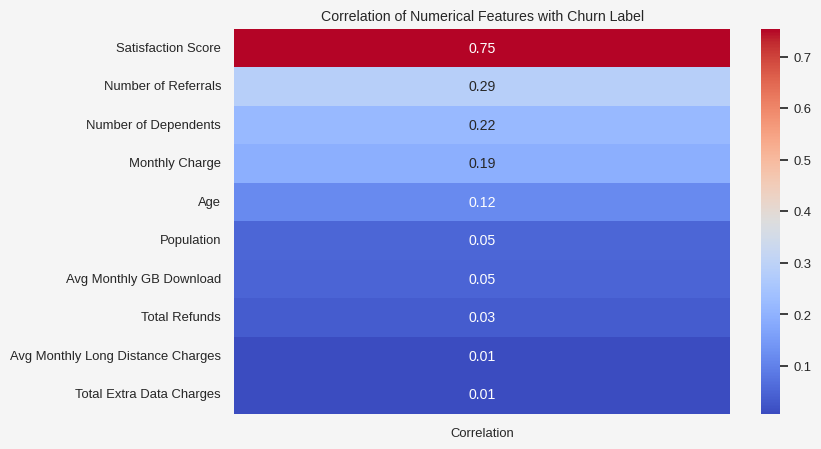

In [47]:
# Encode 'Churn Status' as numerical (e.g., Churned = 1, Stayed = 0)
df_numerical_reduced['Churn_Label_Encoded'] = df_categorical_reduced['Churn_Label_Encoded']

# Compute correlation matrix
corr_matrix = df_numerical_reduced.drop(['Churn_Label_Encoded'], axis=1).corrwith(df_numerical_reduced["Churn_Label_Encoded"]).to_frame(name="Correlation")

# Sort by absolute value
corr_matrix = corr_matrix.abs().sort_values(by="Correlation", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Numerical Features with Churn Label")
plt.show()

Based on the results of the correlation:

- 'Satisfaction Score' is highly correlated to the 'Churn Label'. It seems that it is sort of reflecting one another, so - instead of using it as a predictor - what we would really need to investigate is **what leads to high satisfaction score and consequently low churn**. I'll therefore drop it.
- 'Avg Monthly Long Distance Charges' and 'Total Extra Data Charges' have no meaningful correlation and should be dropped.
- 'Population', 'Avg Monthly GB Download' and 'Total Refunds' have low correlation, and they could potentially be useful in predictions. However, as we are faced with a large set of features - when taking into account the categorical features, too - so we'll drop them.

In [48]:
df_numerical_reduced = df_numerical_reduced.drop(['Satisfaction Score', 'Avg Monthly Long Distance Charges', 'Total Extra Data Charges', 'Population', 'Avg Monthly GB Download', 'Total Refunds'], axis=1)
df_numerical_reduced.head()

,Age,Number of Dependents,Number of Referrals,Monthly Charge,Churn_Label_Encoded
0,78,0,0,39.65,1
1,74,1,1,80.65,1
2,71,3,0,95.45,1
3,78,1,1,98.50,1
4,80,1,1,76.50,1


A rule of thumb is having at least 10x more samples than features to avoid overfitting. In our case, we have 7043 entries with 15 features, meaning it should not be a problem.

## 5. Data Explanatory Analysis

<div id="exploration">
In this section, we'll perform exploratory data analysis (EDA), which means:
    
- Examining the distribution of each of the columns - flagging outliers where needed. This will include a bivariate analysis of the dependent variable with all of the independent variables. 
- Include interaction plots for as many likely scenarios as possible. 
    
The aim of the EDA is to provide this info as visuals - it is much easier to connect with the data in a chart than in a table.
</div>

### 5.1. Distribution of Categorical variables vs. Churn

To better understand churn proportions within each category, we will normalize counts into percentages:

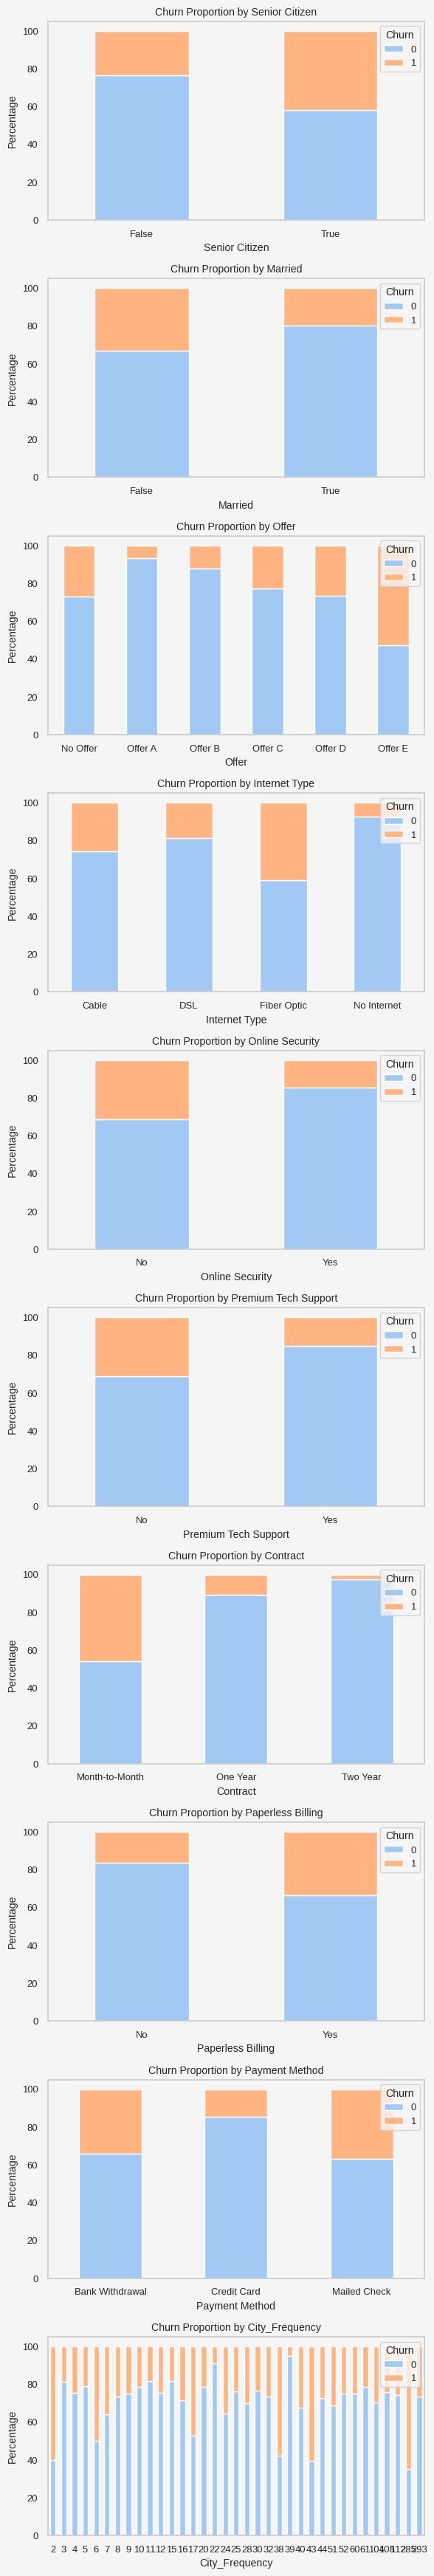

In [ ]:
# Function to plot stacked bar charts
def plot_stacked_bar(df, cat_cols, target):
    fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(6, 3.5 * len(categorical_cols_filtered)))

    for i, col in enumerate(cat_cols):
        crosstab = pd.crosstab(df[col], df[target], normalize="index") * 100
        crosstab.plot(kind="bar", stacked=True, ax=axes[i])

        axes[i].set_title(f"Churn Proportion by {col}")
        axes[i].set_ylabel("Percentage")
        axes[i].set_xlabel(col, rotation = 0)
        axes[i].tick_params(axis='x', rotation=0) 
        axes[i].legend(title="Churn", loc="upper right")

    plt.tight_layout()
    plt.show()
    
# Define target variable
target = "Churn_Label_Encoded"
categorical_cols = df_categorical_reduced.columns
excluded_cols = ["Zip Code", "Churn_Label_Encoded"]
categorical_cols_filtered = [col for col in categorical_cols if col not in excluded_cols]

plot_stacked_bar(df_categorical_reduced, categorical_cols_filtered, target)

### 5.2. Key Observations from Categorical Variables vs. Churn

**Contract Type**
<br>
* Customers on Month-to-Month contracts have the highest churn rate.
<br>
$\Rightarrow$ One-Year and Two-Year contracts show significantly lower churn, suggesting that longer commitments reduce customer attrition.

**Online Security and Tech Support**
<br>
* Customers without Online Security or Premium Tech Support churn more frequently.
<br>
$\Rightarrow$ This indicates that providing security and tech support services might help with customer retention.

**Payment Method**
<br>
* Bank Withdrawal and Mailed Checks have higher churn rates than Credit Cards.
<br>
$\Rightarrow$ This suggests that automatic payments via credit card might encourage customers to stay longer.

**Internet Type**
<br>
* Fiber Optic users show the highest churn rate compared to Cable and DSL.
<br>
$\Rightarrow$ No Internet customers have the lowest churn - that means that services other than internet are deemed more satisfactory.

**Offer Effectiveness**
<br>
* Offer E shows the highest churn rate, indicating it may not be effective in retaining customers.
<br>
$\Rightarrow$ Other offers have a more balanced churn distribution.

**Senior Citizens**
<br>
* Older customers (Senior Citizens = True) have a noticeably higher churn percentage.
<br>
$\Rightarrow$ This could indicate different service expectations or price sensitivity among senior customers.


### 5.3. Distribution of Numerical variables vs. Churn

For the numerical features, we will:

1. Check the distributions of each numerical variable (Histograms, KDE plots).
2. Detect outliers using Box Plots.
3. Analyze Churn vs. Numerical Variables:
   - Box Plots to compare distributions of numerical features across churned and non-churned customers.
   - Violin Plots to observe density distributions.
   - Scatter Plots for correlations between key numerical features and churn.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

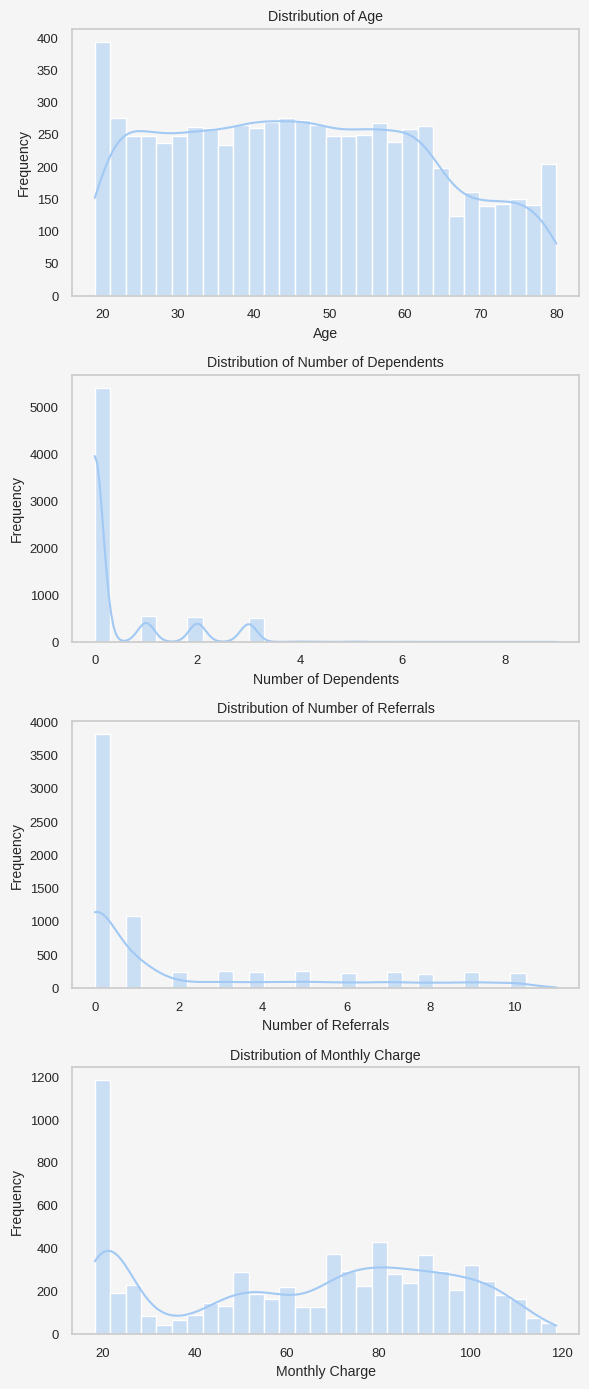

In [50]:
# Define numerical columns
numerical_cols = df_numerical_reduced.columns.tolist()
numerical_cols.remove("Churn_Label_Encoded")  # Exclude target variable

# Plot distribution for numerical variables
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(6, 3.5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.histplot(df_numerical_reduced[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**Comments**

- Age has a uniform distribution, not a normal one.
- Monthly Charge has a uniform distribution with multiple peaks, so not a clear normal distribution.
- Number of Referrals and Number of Dependents are right-skewed, and the order of the value matters (so they are considered either continuous or ordinal)
- Satisfaction Score is not normally distributed either and here too the order of the value matters.

And now let's use boxplots to identify outliers:

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

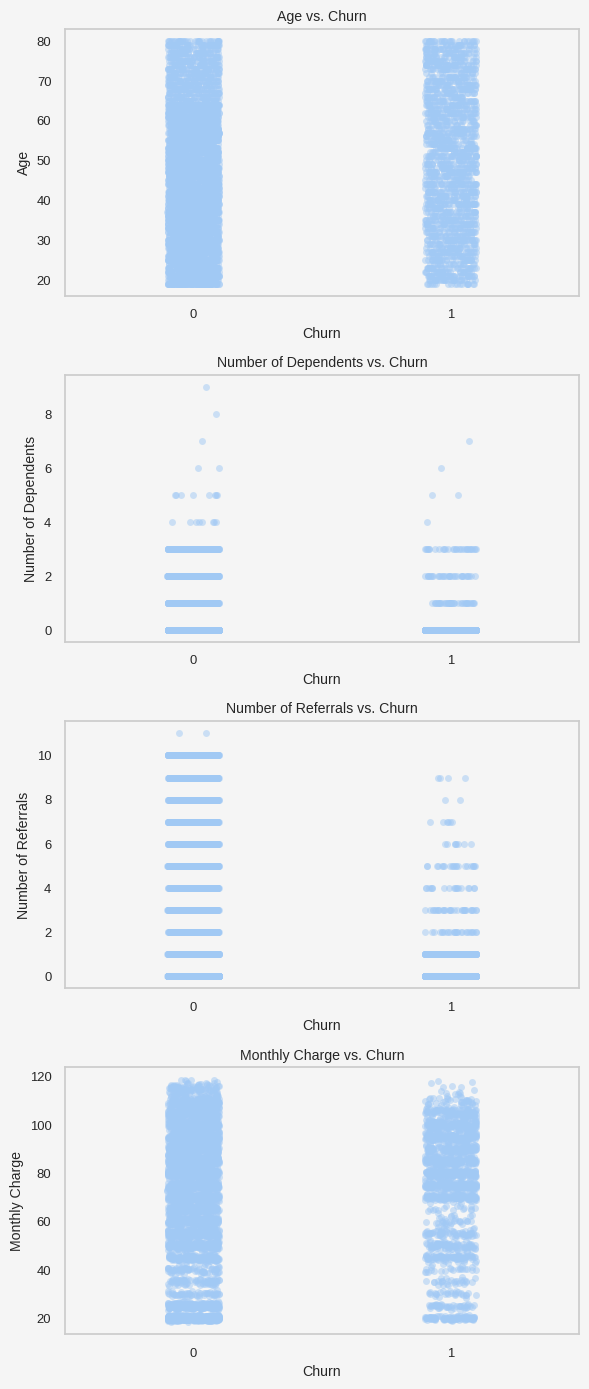

In [51]:
# Define numerical columns (excluding churn)
numerical_cols = df_numerical_reduced.columns.tolist()
numerical_cols.remove("Churn_Label_Encoded")

fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(6, 3.5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.stripplot(x=df_numerical_reduced["Churn_Label_Encoded"], y=df_numerical_reduced[col], jitter=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{col} vs. Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Now that we've explored individual numerical features vs. churn, the next step is to analyze interactions between numerical features to uncover patterns that could affect customer churn.

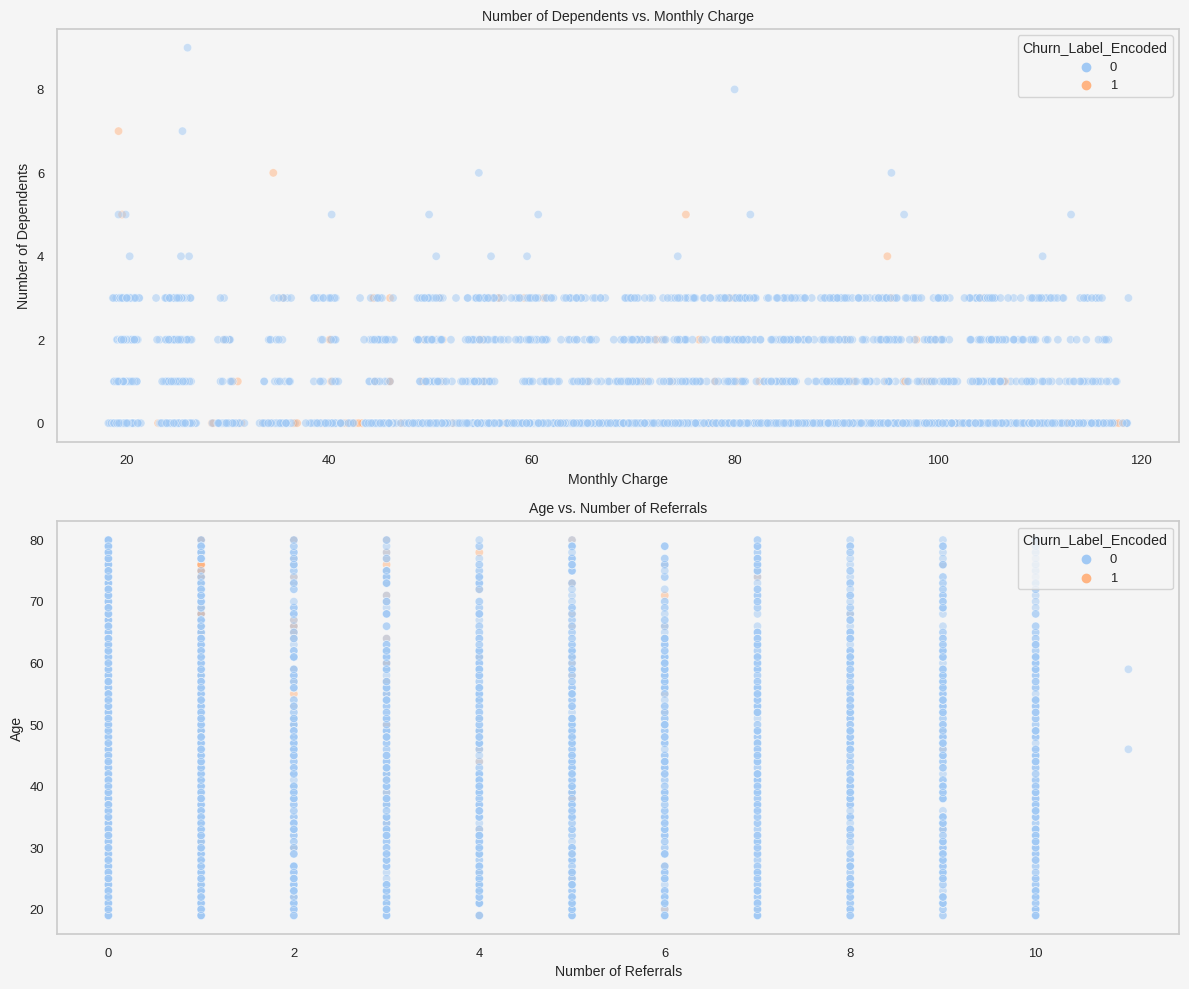

In [52]:
# Define key numerical feature pairs for scatter plot
feature_pairs = [
    ("Monthly Charge", "Number of Dependents"),
    ("Number of Referrals", "Age")
]

# Create scatter plots
fig, axes = plt.subplots(nrows=len(feature_pairs), figsize=(12, 5 * len(feature_pairs)))

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    sns.scatterplot(x=df_numerical_reduced[x_feature], 
                    y=df_numerical_reduced[y_feature], 
                    hue=df_numerical_reduced["Churn_Label_Encoded"], 
                    alpha=0.5, ax=axes[i])
    
    axes[i].set_title(f"{y_feature} vs. {x_feature}")
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

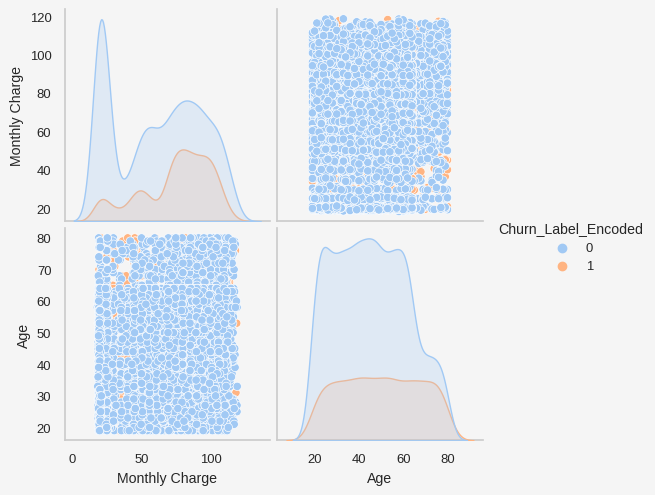

In [ ]:
# Selecting numerical features for pairplot
selected_features = ["Monthly Charge", "Age", "Churn_Label_Encoded"]

sns.pairplot(df_numerical_reduced[selected_features], hue="Churn_Label_Encoded", diag_kind="kde")
plt.show()

### 5.4. Key Observations from Numerical Feature Interactions

* **Customers with dependents and referrals tend to have lower churn:** I'll create a "Family_Status" feature to capture this more clearly.
* **Customers with low Monthly Charges (<$30) have a distinct churn pattern, meaning they are more loyal:** This could indicate that they are on a promotional plan or lower-tier service, which might influence churn. Low-paying customers may churn when discounts end or if they are less engaged, so I'll create a new feature to distinguish them, too.

### 5.5. New Features and Evaluation

Let's start by creating the new features:

In [54]:
# New family status feature
df_numerical_reduced["Family_Status"] = ((df_numerical_reduced["Number of Dependents"] > 0) & 
                                         (df_numerical_reduced["Number of Referrals"] > 0)).astype(int)

In [55]:
# New low cost plan feature
df_numerical_reduced["Discounted_Plan"] = (df_numerical_reduced["Monthly Charge"] < 30).astype(int)

What we now want to see is:
* How these newly created features are distributed
* How they relate to churn 

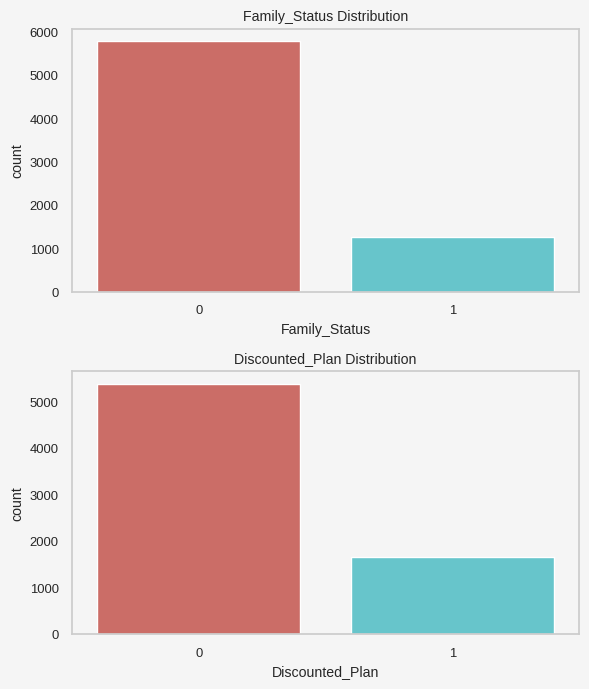

In [56]:
# Plot new features distribution
new_features_cols = ['Family_Status', 'Discounted_Plan']

fig, axes = plt.subplots(nrows = len(new_features_cols), figsize=(6,3.5 * len(new_features_cols)))

for i, col in enumerate(new_features_cols):
    sns.countplot(df_numerical_reduced, x=col, ax=axes[i], palette="hls")
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

From the countplots, we see that most clients (~80-85%):
- Don't have both dependents and referrals
- Aren't in low monthly charges packages

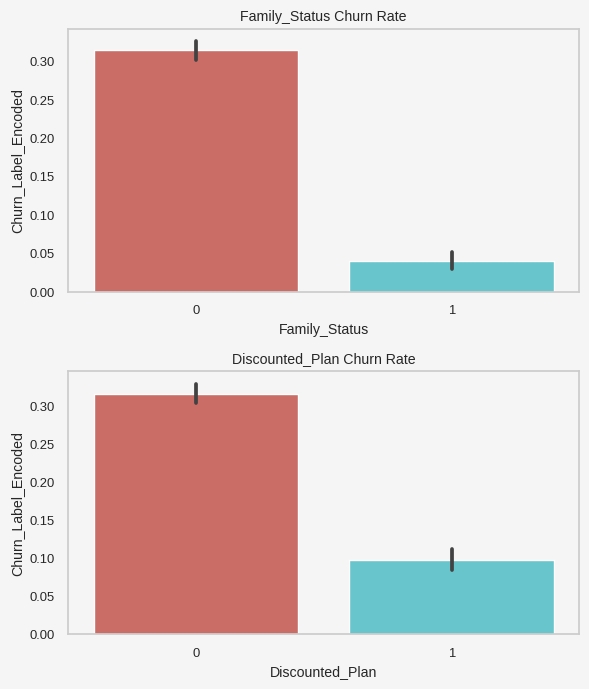

In [57]:
# Plot new features related to churn
fig, axes = plt.subplots(nrows = len(new_features_cols), figsize=(6,3.5 * len(new_features_cols)))

for i, col in enumerate(new_features_cols):
    sns.barplot(x=df_numerical_reduced[col], y=df_numerical_reduced["Churn_Label_Encoded"], ax=axes[i], palette="hls")
    axes[i].set_title(f'{col} Churn Rate')

plt.tight_layout()
plt.show()

These barplots show the average churn rate for each group. On the y-axis, the values represent the mean of the Churn_Label_Encoded variable, which is 1 for churned customers and 0 for retained customers. Since it’s an average of a binary variable, this essentially represents the percentage of customers who churned in each category.

**Family_Status**
- Customers without dependents or referrals (Family_Status = 0) have a significantly higher churn rate (~30%).
- Customers with dependents and referrals (Family_Status = 1) churn much less (~5%).

**Discounted_Plan**
- Customers who are not on a discounted plan (Discounted_Plan = 0) churn at a rate of ~30%.
- Customers on a discounted plan (Discounted_Plan = 1) have a lower churn rate (~10%).

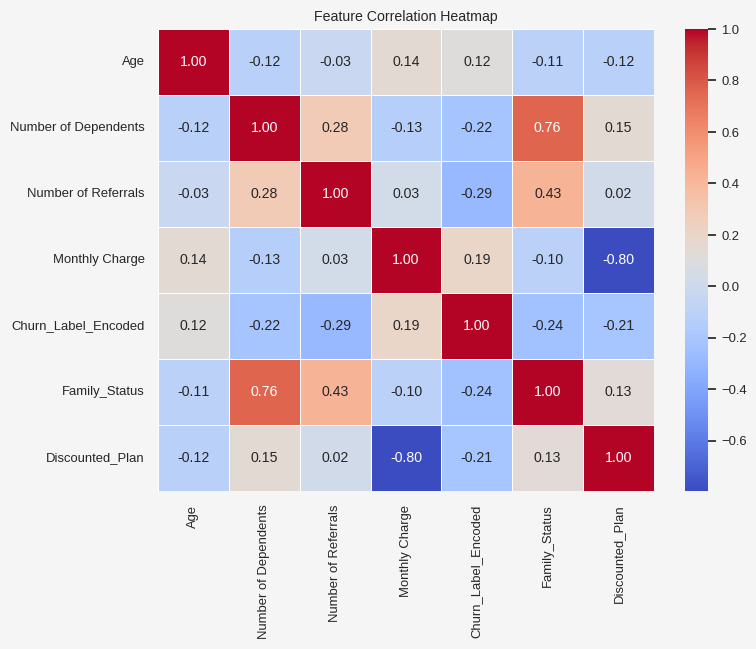

In [58]:
# Correlation heatmap
corr_matrix = df_numerical_reduced.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 5.6. Model Choice for Analysis and Prediction

Based on the final set of features (both numerical and categorical) and their properties, we should choose a model that:

* Handles both numerical and categorical features well.
* Does not require heavy feature scaling (as numerical values differ in scale).
* Is robust to non-linear relationships and captures interactions effectively.

Choosing the right model for the analysis depends on factors such as dataset size, feature types, and model interpretability. We have a medium-sized dataset (7000 entries) with a combination of numerical and categorical features. The features can be summed as follows:

| Feature Type        | Feature Name             | Data Type         |
|:--------------------|:-------------------------|:------------------|
| **Numerical** | Age                      | Continuous        |
|                     | Monthly Charge           | Continuous        |
|                     | Number of Dependents     | Ordinal, Discrete |
|                     | Number of Referrals      | Ordinal, Discrete |
| **Categorical** | Senior Citizen           | Binary            |
|                     | Married                  | Binary            |
|                     | Online Security          | Binary            |
|                     | Premium Tech Support     | Binary            |
|                     | Paperless Billing        | Binary            |
|                     | Offer                    | Multi-Class       |
|                     | Internet Type            | Multi-Class       |
|                     | Contract                 | Multi-Class       |
|                     | Payment Method           | Multi-Class       |
|                     | City            | Numerical (from Categorical)|
| **Target** | Churn_Label_Encoded               | Binary            |


Some common model options are:
- Logistic Regression: It is simple in interpretation and easy to deploy but a) assumes a linear relationship between features and output b) requires standarization of numerical featues and c) will require encoding to handle both numerical and categorical features.
- K-Nearest Neighbors (KNN) is a distance based model, and hence will also require standarization, while not handling non-linearity well.
- Neural Networks require larger datasets to work well.
- Random Forest and Extreme Gradient Boosting appear to be two sensible models for this case, as they work well with both categorical and numerical data without scaling. I'll opt for **Random Forest**.

#### 5.6.1. Encode Categorical Variables

Since I will be using Random Forest, I'll perform One-Hot Encoding to categorical features with <10 unique values:

In [142]:
categorical_cols

Index(['Senior Citizen', 'Married', 'Offer', 'Internet Type',
       'Online Security', 'Premium Tech Support', 'Contract',
       'Paperless Billing', 'Payment Method', 'City_Frequency',
       'Churn_Label_Encoded'],
      dtype='object')

In [59]:
# Select categorical columns (excluding City and Churn)
low_cardinality_cols = categorical_cols[:-2]
low_cardinality_cols

Index(['Senior Citizen', 'Married', 'Offer', 'Internet Type',
       'Online Security', 'Premium Tech Support', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')

In [60]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse=False)
X_categorical = encoder.fit_transform(df_categorical_reduced[low_cardinality_cols])
X_categorical = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Merge with dataset
df_categorical_reduced = df_categorical_reduced.drop(columns=low_cardinality_cols).join(X_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


I don't need to standarize the 'City_Frequency' column, because Decision Trees split on thresholds rather than scaling values. Now let's merge numerical and categorical features:

In [62]:
# Drop target variable before merging
df_final = df_numerical_reduced.drop(columns=["Churn_Label_Encoded"]).join(df_categorical_reduced).drop(columns=["Churn_Label_Encoded"])
df_final.head()

,Age,Number of Dependents,Number of Referrals,Monthly Charge,Family_Status,Discounted_Plan,City_Frequency,Senior Citizen_True,Married_True,Offer_Offer A,...,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Online Security_Yes,Premium Tech Support_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,78,0,0,39.65,0,0,293,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,74,1,1,80.65,1,0,293,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,71,3,0,95.45,0,0,293,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,78,1,1,98.50,1,0,25,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,80,1,1,76.50,1,0,30,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
print(df_final.isnull().sum())

Age                            0
Number of Dependents           0
Number of Referrals            0
Monthly Charge                 0
Family_Status                  0
Discounted_Plan                0
City_Frequency                 0
Senior Citizen_True            0
Married_True                   0
Offer_Offer A                  0
Offer_Offer B                  0
Offer_Offer C                  0
Offer_Offer D                  0
Offer_Offer E                  0
Internet Type_DSL              0
Internet Type_Fiber Optic      0
Internet Type_No Internet      0
Online Security_Yes            0
Premium Tech Support_Yes       0
Contract_One Year              0
Contract_Two Year              0
Paperless Billing_Yes          0
Payment Method_Credit Card     0
Payment Method_Mailed Check    0
dtype: int64


Let's make sure that all features are numeric, as Decision Trees can’t handle object types:

In [64]:
print(df_final.dtypes)

Age                              int64
Number of Dependents             int64
Number of Referrals              int64
Monthly Charge                 float64
Family_Status                    int64
Discounted_Plan                  int64
City_Frequency                   int64
Senior Citizen_True            float64
Married_True                   float64
Offer_Offer A                  float64
Offer_Offer B                  float64
Offer_Offer C                  float64
Offer_Offer D                  float64
Offer_Offer E                  float64
Internet Type_DSL              float64
Internet Type_Fiber Optic      float64
Internet Type_No Internet      float64
Online Security_Yes            float64
Premium Tech Support_Yes       float64
Contract_One Year              float64
Contract_Two Year              float64
Paperless Billing_Yes          float64
Payment Method_Credit Card     float64
Payment Method_Mailed Check    float64
dtype: object


Numerical features don't require any transformation (such as e.g. standarization) as Decision Trees work with thresholds and are not a distance-based model.

## 6. Prediction Model

### 6.1. Data split

<div id="prediction">
To validate our prediction model, we will performa "Train test split", which is a validation procedure that splits a dataset into a training set and a testing set, to determine how the model performs on new data:
</div>

In [65]:
# Define X and y
# Features (X)
X = df_final  
# Define target variable (y)
y = df_numerical_reduced["Churn_Label_Encoded"]

# Using stratify=y ensures that the proportion of churn (1s) and non-churn (0s) remains the same in both the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (5634, 24)
Testing size: (1409, 24)


### 6.2. Decision Tree model training and evaluation

We'll start with a simple Decision Tree classifier using default hyperparameters:

In [ ]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7792760823278921

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



**Comments**

- The model identifies well customers who stay (84%), however it's struggling to detect actual churn cases (59%).
- Lower recall for churn (0.55) means many churners are being misclassified as non-churners. This is a business risk because predicting that a churning customer will stay means we lose a chance to take action (e.g., offer a discount)

Let's also examine feature importance:

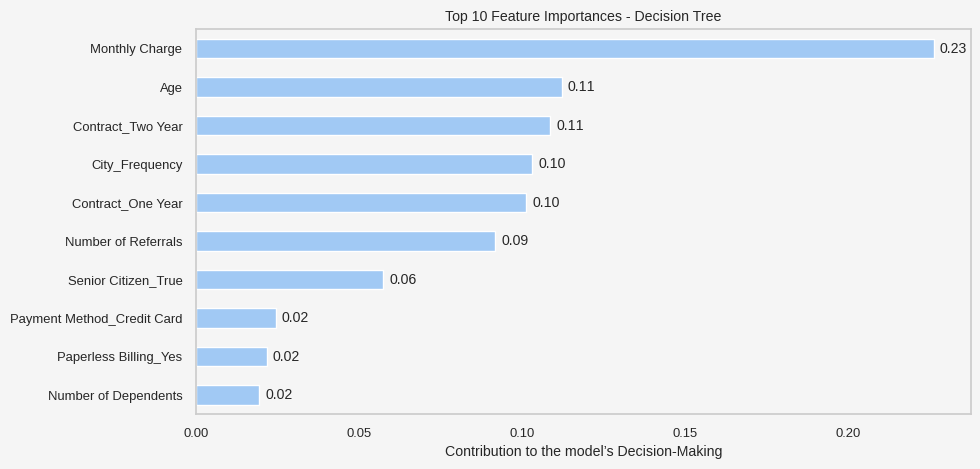

In [67]:
# Get feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
feature_importance[:10].plot(kind="barh")
plt.xlabel("Contribution to the model’s Decision-Making")
plt.title("Top 10 Feature Importances - Decision Tree")
plt.gca().invert_yaxis()

# Add labels to bars
for index, value in enumerate(feature_importance[:10]):
    plt.text(value + 0.0019, index, f"{value:.2f}", va='center')  

plt.show()

**Comments**

* Monthly Charge is the most important factor: Customers paying more may churn more.
* Contract Type matters: Two-year contracts reduce churn compared to month-to-month
* City Frequency has some influence: Certain locations seem to have different churn rates.

### 6.3. Random Forest model training and evaluation

As Decision trees can be prone to overfitting, let's try **Random Forest**, which is considered a more powerful model:

In [68]:
# Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8339247693399574

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1035
           1       0.73      0.59      0.65       374

    accuracy                           0.83      1409
   macro avg       0.80      0.76      0.77      1409
weighted avg       0.83      0.83      0.83      1409



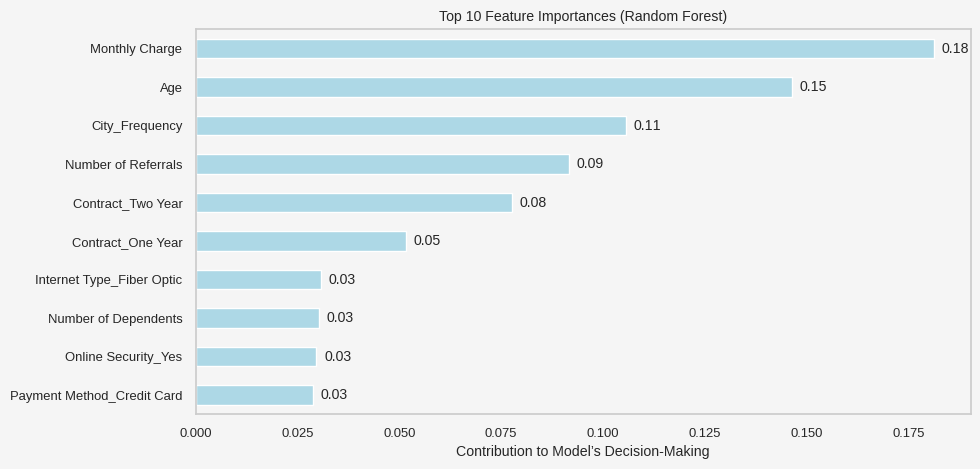

In [69]:
# Extract feature importance from the model
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort values in descending order
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
feature_importance_rf[:10].plot(kind="barh", color="lightblue")
plt.xlabel("Contribution to Model’s Decision-Making")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance at the top

# Add labels to bars
for index, value in enumerate(feature_importance_rf[:10]):
    plt.text(value + 0.0019, index, f"{value:.2f}", va='center')

plt.show()

**Comments**

* Once again, Monthly Charges, Age and City appear to make the most contribution in a client churning.

It is therefore worth further exploring these features:

- **Monthly Charge:** I'll create segments (e.g., low, mid, high spenders) and analyze churn in each group. Is there a price threshold beyond which churn spikes?
- **Age:** Are younger customers churning more?
- **Cities:** Are specific cities driving higher churn?

### 6.4. Feature exploration

### 6.4.1. Monthly Charge

Based on the spread of Monthly Charge seen in Chapter 3 (appr. 20-120) I will divide customers into spending categories:
* Low Spend: Below 40
* Mid Spend: 40 - 80
* High Spend: Above 80

I will then analyze churn rates within each segment.

In [70]:
# I'll start by re-introducing Churn Label in order to perform groupby
df_final["Churn_Label_Encoded"] = df_numerical_reduced["Churn_Label_Encoded"]

<ipython-input-73-5fddaac2aaff>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_churn = df_final.groupby("Charge_Segment")["Churn_Label_Encoded"].mean()


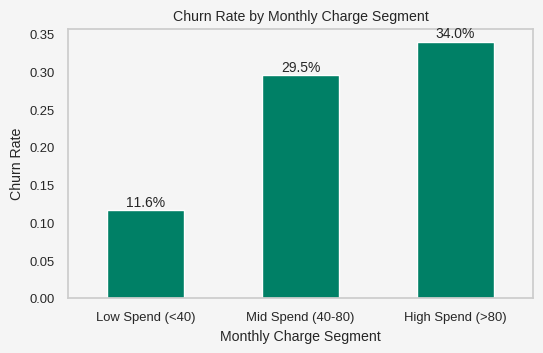

In [73]:
# Define charge segments
bins = [0, 40, 80, df_final["Monthly Charge"].max()]
labels = ["Low Spend (<40)", "Mid Spend (40-80)", "High Spend (>80)"]
df_final["Charge_Segment"] = pd.cut(df_final["Monthly Charge"], bins=bins, labels=labels, include_lowest=True)

# Calculate churn rate per segment
charge_churn = df_final.groupby("Charge_Segment")["Churn_Label_Encoded"].mean()

# Plot
plt.figure(figsize=(6,3.5))
charge_churn.plot(kind='bar', colormap='summer')

# Add labels on top of bars
for index, value in enumerate(charge_churn):
    plt.text(index, value + 0.0055, f"{value:.1%}", ha='center', fontsize=10)

plt.title("Churn Rate by Monthly Charge Segment")
plt.ylabel("Churn Rate")
plt.xlabel("Monthly Charge Segment")
plt.xticks(rotation=0)
plt.show()

**Comment**

Mid and High spenders are more likely to churn. That could suggest making the packages offered to them more competitive. Those offering Fiber Optic and Online Security might need particular attention (as they contribute significantly to churn)

### 6.4.2. Age

We divide customers by age group:

* Young (18-30)
* Middle-Aged (30-55)
* Senior (55+)

Then, we analyze churn rate per age group:

<ipython-input-75-221170b4c2d9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df_final.groupby("Age_Segment")["Churn_Label_Encoded"].mean()


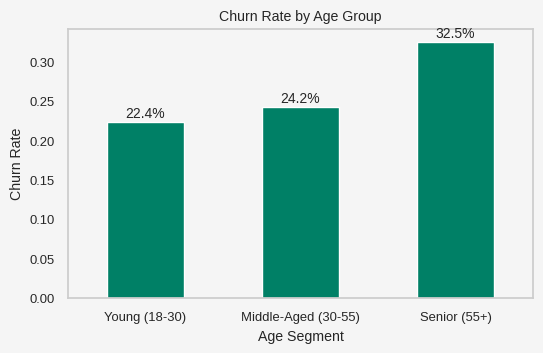

In [75]:
# Define age segments
bins = [18, 30, 55, df_final["Age"].max()]
labels = ["Young (18-30)", "Middle-Aged (30-55)", "Senior (55+)"]
df_final["Age_Segment"] = pd.cut(df_final["Age"], bins=bins, labels=labels, include_lowest=True)

# Calculate churn rate per age segment
age_churn = df_final.groupby("Age_Segment")["Churn_Label_Encoded"].mean()

# Plot
plt.figure(figsize=(6,3.5))
age_churn.plot(kind='bar', colormap='summer')

# Add labels on top of bars
for index, value in enumerate(age_churn):
    plt.text(index, value + 0.0055, f"{value:.1%}", ha='center', fontsize=10)

plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate")
plt.xlabel("Age Segment")
plt.xticks(rotation=0)
plt.show()

**Comment**

Senior citizens are more likely to churn. What can be done to make those packages offered to them more attractive?

### 6.4.3. Cities (Location)

Do  cities with more customers have higher or lower churn?

<ipython-input-80-6b9957118c04>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_churn = df_final.groupby("City_Frequency_Category")["Churn_Label_Encoded"].mean()


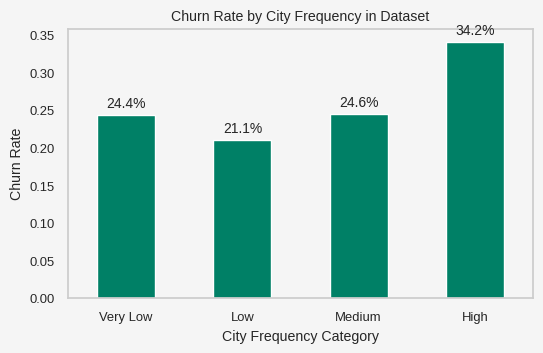

In [80]:
# Create city frequency categories (quartiles)
# qcut is used to discretize a variable into equal-sized buckets based on Number of quantiles, in this case 4
df_final["City_Frequency_Category"] = pd.qcut(df_final["City_Frequency"], q=4, labels=["Very Low", "Low", "Medium", "High"])

# Calculate churn rate per category
city_churn = df_final.groupby("City_Frequency_Category")["Churn_Label_Encoded"].mean()

# Plot
plt.figure(figsize=(6,3.5))
ax = city_churn.plot(kind='bar', colormap='summer')

# Add labels on top of bars
for index, value in enumerate(city_churn):
    plt.text(index, value + 0.01, f"{value:.1%}", ha='center', fontsize=10)

plt.title("Churn Rate by City Frequency in Dataset")
plt.ylabel("Churn Rate")
plt.xlabel("City Frequency Category")
plt.xticks(rotation=0)

plt.show()

**Comment**

These results show a paradox: cities with a higher number of customers in the dataset also have higher churn rates. This could be due to these clients been attracted by a marketing campaigns, and thus receiving promotional offers which, once they expire, are discontinued. Remember we had stored city counts in a variable:

In [125]:
# Display top 10 cities with highest churn
city_counts.head(10)

City
Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Name: count, dtype: int64

This reveals that:

- Los Angeles, San Diego, San Jose, and San Francisco are major urban hubs with high population and competitive telecom markets. This means that customers can easily switch providers if dissatisfied.
- They are also tech-savvy, which means higher expectations for bundles and solutions, customer service and pricing.

Let's examine whether contract duration or charges play a role in churn ratios:

In [139]:
df_final["City"] = cities_column

# Filter the DataFrame to include only the specified California cities
california_cities = ["Los Angeles", "San Diego", "San Jose", "Sacramento", "San Francisco",
                     "Fresno", "Long Beach", "Oakland", "Escondido", "Stockton"]
filtered_df = df_final[df_final["City"].isin(california_cities)]

# Group by city, calculate the mean, and sort
sorted_grouped_data = filtered_df.groupby("City")[["Contract_One Year", "Contract_Two Year", "Churn_Label_Encoded"]].mean()
sorted_grouped_data = sorted_grouped_data.sort_values(by='Churn_Label_Encoded', ascending = False)

sorted_grouped_data.head(10)

,Contract_One Year,Contract_Two Year,Churn_Label_Encoded
City,,,
San Diego,0.189474,0.108772,0.649123
Escondido,0.235294,0.274510,0.313725
San Francisco,0.221154,0.288462,0.298077
Stockton,0.136364,0.272727,0.272727
Los Angeles,0.215017,0.259386,0.266212
San Jose,0.205357,0.267857,0.258929
Long Beach,0.166667,0.266667,0.250000
Oakland,0.288462,0.211538,0.250000
Sacramento,0.277778,0.268519,0.240741


In [140]:
df_final[df_final["City"].isin(["Los Angeles", "San Diego", "San Jose", "Sacramento", "San Francisco",
                                "Fresno", "Long Beach", "Oakland", "Escondido", "Stockton"])] \
        .groupby("City")["Monthly Charge"].mean()

City
Escondido        67.879412
Fresno           63.633607
Long Beach       65.367500
Los Angeles      62.132594
Oakland          66.400000
Sacramento       62.726389
San Diego        72.021930
San Francisco    64.642308
San Jose         65.589286
Stockton         65.878409
Name: Monthly Charge, dtype: float64

**Comments**

- San Diego has a very high churn rate (64.9%). It also has a high monthly charge rate (72.02 USD), which suggests price sensitivity could be a factor. Since only ~19% are on a One-Year Contract, and just ~10% are on a Two-Year Contract, short-term contracts (Month-to-Month) likely dominate this city. Customers in San Diego might be more willing to switch providers due to high competition or dissatisfaction with pricing.
- Escondido also has a high churn rate (31.3%), while Monthly Charge is the highest (67.88 USD) after San Diego. In contrast to San Diego, it has 23.5% and 27.5 in one-year and two-year contracts, respectively, so it might be other factors causing churn (e.g., network quality, customer service, competition).
- Two-year contracts are high in LA, San Francisco, Sacramento and Oakland, confirming that in general longer contracts reduce churn.

## 7. Business Action Recommendations

Based on our exploratory data analysis, prediction modeling, and churn investigation, the following steps to reduce churn and improve customer retention are proposed:

#### 1. Address High Churn in Key Cities (San Diego & Escondido)

**Finding:**

* San Diego has the highest churn rate (64.9%) and highest average Monthly Charge (72.02 USD).
* Escondido also experiences high churn (31.3%) with high Monthly Charges (67.88 USD).
* These cities also have a lower percentage of long-term contracts (One-Year & Two-Year).

**Recommendations:**
* Offer discounts for long-term contracts (One-Year & Two-Year) to encourage customer commitment.
* Identify high-churn customers and offer loyalty perks.
* Investigate regional service quality issues, e.g. conduct customer satisfaction surveys to determine if poor service quality is a driver of churn.
* Research local competitors' pricing and service offerings. Consider matching competitor pricing or improving value-added services.

#### 2. Pricing Optimization for Monthly Charge Segments

**Finding:**

* Customers with higher Monthly Charges churn at significantly higher rates.
* "Low-spend" customers (<40 USD) have lower churn, while "high-spend" customers (>80 USD) are more likely to leave.

**Recommendations:**
* Introduce personalized retention offers for high spenders.
* Offer premium customer support for high-paying customers.
* Are premium plans priced too high compared to competitors? Re-evaluate pricing strategy for premium plans.
* Consider adding additional benefits (higher speeds, priority customer support, free streaming services) to justify the cost.
* Make limited-time offers that increase commitment (e.g., "Sign a 2-year contract now and get 10% off your monthly bill").

#### 3. Increase Long-Term Contract Engagement

**Finding:**
* Churn is significantly lower for customers on long-term contracts (one-year & two-year).
* High-churn cities have a lower percentage of long-term contracts.

**Recommendations:**
* Expand incentives for long-term contracts.
* Offer stronger discounts for committing to a one-year or two-year contract or other benefits (e.g. priority support, free device upgrades etc.).
* Target month-to-month customers with proactive renewal offers.


#### 4. Addressing High Churn Among Senior Customers

**Finding:**
* Seniors (55+) have the highest churn rate at 32.5%, significantly higher than middle-aged (24.2%) and young customers (22.4%).

**Recommendations:**
* Dedicated customer support for seniors: Many older customers may prefer phone-based or in-person support rather than digital self-service tools.
* Senior-friendly product bundles: Offer simplified internet + phone service plans with clear pricing and easy access to support.

#### 5. Using Referrals & Family Status to Reduce Churn

**Finding:**

* Customers with referrals are less likely to churn.
* Customers with dependents tend to be more stable, likely due to shared family usage.

**Recommendations:**
* Offer better incentives for both referrers and new customers (e.g., discounts, service upgrades).
* Implement a tiered referral program where customers earn increasing rewards for multiple successful referrals.
* Employ family discounts or bundle offers that incentivize customers to add dependents to their plan.
* Offer family-friendly support services (e.g., parental controls, joint account management).

#### 6. Monitor Client Satisfaction for Future Churn Prevention

**Finding:**

The model used in the analysis performed well in predicting churn (~83% accuracy using Random Forest).
Satisfaction Score was a major predictor (it was removed for business actionability).
The model showed that Monthly Charge, Age, and City Frequency significantly impact churn.

**Recommendations:**

* Deploy churn prediction in real-time customer, focusing in the clients highlighted in this analysis.
* Based on real-time satisfaction scores, use the model on low satisfaction clients to investigate / confirm the aforementioned findings, and work on improvements.
* Use retention strategies (e.g., targeted offers, priority support) for flagged customers.
* Integrate churn insights into marketing and sales strategies.




In [144]:
# Export clean dataset
df_final.to_csv("telco_churn_clean.csv", index=False)